<a href="https://colab.research.google.com/github/Gowthamabinav-VP/SDC_GENAI/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 78ms/step - accuracy: 0.3180 - loss: 1.8425 - val_accuracy: 0.5452 - val_loss: 1.2816
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.5297 - loss: 1.3082 - val_accuracy: 0.5990 - val_loss: 1.1268
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.5869 - loss: 1.1667 - val_accuracy: 0.6320 - val_loss: 1.0414
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.6234 - loss: 1.0617 - val_accuracy: 0.6674 - val_loss: 0.9578
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.6531 - loss: 0.9942 - val_accuracy: 0.6904 - val_loss: 0.9109
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.6721 - loss: 0.9290 - val_accuracy: 0.6946 - val_loss: 0.8819
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.6916 - loss: 0.8766 - val_accuracy: 0.7014 - val_loss: 0.8550
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 82ms/step - accuracy: 0.7092 - loss: 0.8303 - 

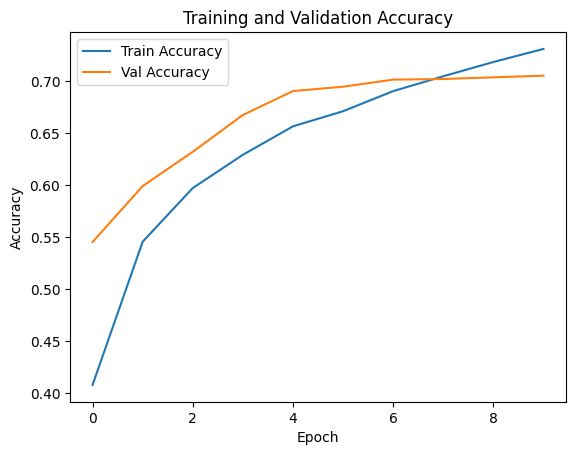

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


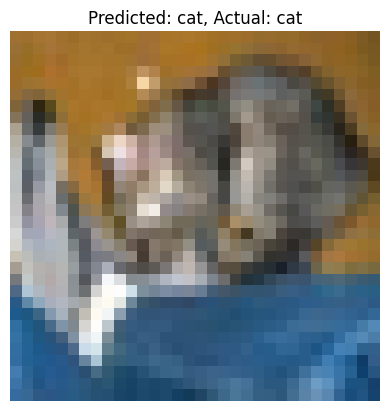

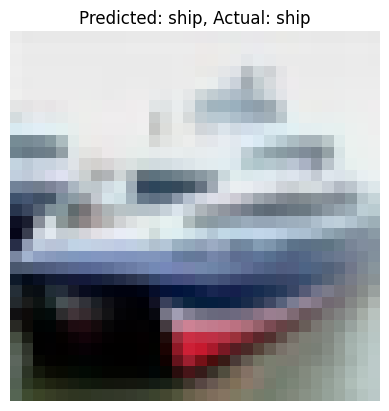

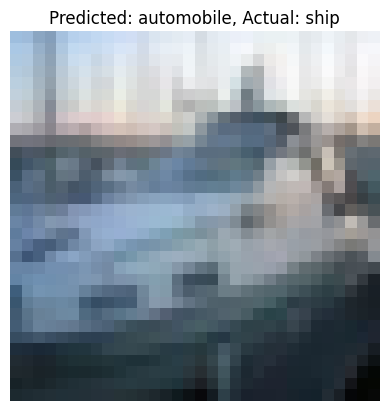

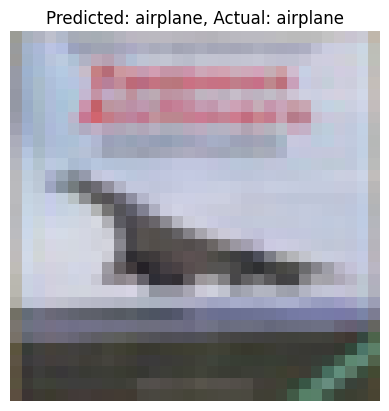

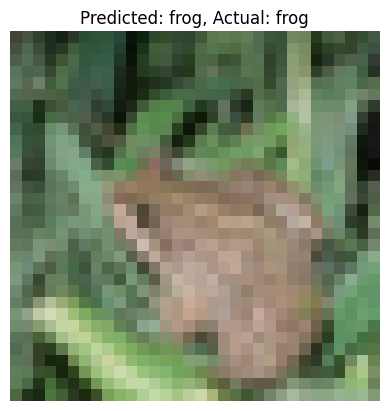

In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=1)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 7: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Step 8: Predict and visualize
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
    plt.axis('off')
    plt.show()
